In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'


In [3]:
model=cv2.dnn_DetectionModel(config_file,frozen_model)

In [11]:
etıket=[]
dosya_adı='coco.txt'

with open(dosya_adı,'rt') as fpt:
   etıket=fpt.read().rsplit('\n')
   etıket.append(fpt.read())

In [12]:
print(etıket)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '', '']


In [13]:
print(len(etıket))

82


In [14]:
img=cv2.imread('adamvearaba.jpg')

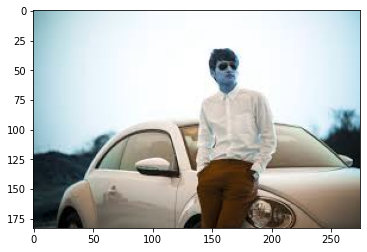

In [16]:
plt.imshow(img); #bgr

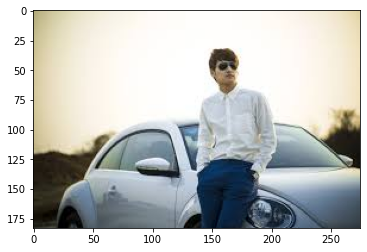

In [21]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); #ORJİNAL hali

In [23]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 000002976C8409C0>

In [26]:
ındex,confidece,bbox=model.detect(img,confThreshold=0.5)
print(ındex)

[[1]
 [3]]


In [27]:
print(etıket) #gördügün gibi 1 ve 3 yazan yer person ve car !_!

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '', '']


In [28]:
#dikdörtgen içinde yazdırmak

In [39]:
fon=3
font=cv2.FONT_HERSHEY_PLAIN
for ındexx,conf,boxes in zip(ındex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,etıket[ındexx-1],(boxes[0]+10,boxes[1]+40),font,fontScale=fon,color=(0,0,0),thickness=3)

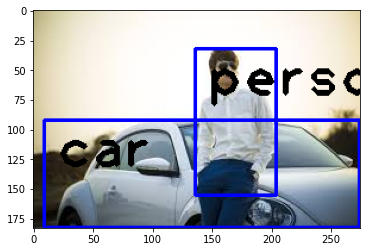

In [40]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))